In [1]:
import librosa as lr
import pandas as pd
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [2]:
audio,sfreq=lr.load("C:\\Users\\TheBossDiwakar\\Desktop\\Audio\\Dogsound.wav",duration=10.0)

In [3]:
audio
print(audio.dtype)
print(audio.shape)

float32
(220500,)


In [4]:
sfreq

22050

In [5]:
time=np.arange(0,len(audio))/sfreq
time

array([0.00000000e+00, 4.53514739e-05, 9.07029478e-05, ...,
       9.99986395e+00, 9.99990930e+00, 9.99995465e+00])

In [6]:
print(len(audio))
print(len(time))

220500
220500


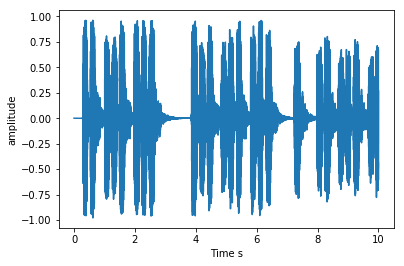

In [7]:
fig,ax=plt.subplots()
ax.plot(time,audio)
ax.set(xlabel='Time s',ylabel='amplitude')
plt.show()

In [8]:
lr.output.write_wav('C:\\Users\\TheBossDiwakar\\Desktop\\Audio\\Dogsound_out.wav', audio, sfreq)

In [9]:
#help(AudioSegment
import os
os.chdir("C:\\Users\\TheBossDiwakar\\Desktop\\Audio\\songs2\\")
print(os.getcwd())

C:\Users\TheBossDiwakar\Desktop\Audio\songs2


In [10]:
#audio1,sfreq1=lr.load("C:\\Users\\TheBossDiwakar\\Desktop\\Audio\\aaromale\\kabirsingh.wav",duration=15.0)
audio2,sfreq2=lr.load("C:\\Users\\TheBossDiwakar\\Desktop\\Audio\\aaromale\\pachchaini.wav",duration=15.0)
audio1,sfreq1=lr.load("C:\\Users\\TheBossDiwakar\\Desktop\\Audio\\aaromale\\roja.wav",duration=15.0)


In [11]:
time1=np.arange(0,len(audio1))/sfreq1
time2=np.arange(0,len(audio2))/sfreq2
#time3=np.arange(0,len(audio3))/sfreq3
time1

array([0.00000000e+00, 4.53514739e-05, 9.07029478e-05, ...,
       1.49998639e+01, 1.49999093e+01, 1.49999546e+01])

In [12]:
print(len(audio1))
print(len(time1))
print(len(audio2))
print(len(time2))
#print(len(audio3))
#print(len(time3))

330750
330750
330750
330750


In [16]:
import tensorflow as tf
import warnings
warnings.filterwarnings('ignore')

In [17]:
audio3 = np.nan_to_num(np.multiply(audio1,np.log(audio2)))
df = pd.DataFrame(audio3)
df['audio2']=audio2
df['audio1']=audio1

In [18]:
df.shape

(330750, 3)

In [19]:
x = df.values
x

array([[ 0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ],
       ...,
       [ 0.76805276,  0.00334896, -0.13476723],
       [ 0.5438754 ,  0.02091424, -0.14063348],
       [ 0.37982655,  0.05852873, -0.1338248 ]], dtype=float32)

In [20]:
tf.reset_default_graph()

num_inputs=3    #28x28 pixels
num_hid1=300
num_hid2=150
num_hid3=75
num_hid4=36
num_hid5=18
num_hid6=9
num_output=1
lr=0.01
actf=tf.nn.leaky_relu
#actf=tf.nn.tanh

X=tf.placeholder(tf.float32,shape=[None,num_inputs])
initializer=tf.variance_scaling_initializer(scale=1.0, mode='fan_in', distribution='untruncated_normal',seed=123)

w1=tf.Variable(initializer([num_inputs,num_hid1]),dtype=tf.float32)
w2=tf.Variable(initializer([num_hid1,num_hid2]),dtype=tf.float32)
w3=tf.Variable(initializer([num_hid2,num_hid3]),dtype=tf.float32)
w4=tf.Variable(initializer([num_hid3,num_hid4]),dtype=tf.float32)
w5=tf.Variable(initializer([num_hid4,num_hid5]),dtype=tf.float32)
w6=tf.Variable(initializer([num_hid5,num_hid6]),dtype=tf.float32)
w7=tf.Variable(initializer([num_hid6,num_output]),dtype=tf.float32)

b1=tf.Variable(tf.ones(num_hid1))
b2=tf.Variable(tf.ones(num_hid2))
b3=tf.Variable(tf.ones(num_hid3))
b4=tf.Variable(tf.ones(num_hid4))
b5=tf.Variable(tf.ones(num_hid5))
b6=tf.Variable(tf.ones(num_hid6))
b7=tf.Variable(tf.ones(num_output))

hid_layer1=actf(tf.matmul(X,w1)+b1)
hid_layer2=actf(tf.matmul(hid_layer1,w2)+b2)
hid_layer3=actf(tf.matmul(hid_layer2,w3)+b3)
hid_layer4=actf(tf.matmul(hid_layer3,w4)+b4)
hid_layer5=actf(tf.matmul(hid_layer4,w5)+b5)
hid_layer6=actf(tf.matmul(hid_layer5,w6)+b6)
output_layer=actf(tf.matmul(hid_layer6,w7)+b7)

In [21]:
sess=tf.Session()
init=tf.global_variables_initializer()
sess.run(init)
output2=sess.run(output_layer,{X:x})
sess.close()

In [24]:
import librosa as lr
lr.output.write_wav('C:\\Users\\TheBossDiwakar\\Desktop\\Audio\\roja_aaromale.wav', output2 ,sfreq)

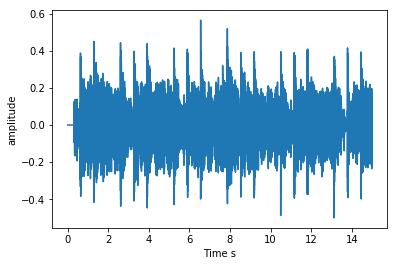

In [25]:
fig,ax=plt.subplots()
ax.plot(time1,audio1)
ax.set(xlabel='Time s',ylabel='amplitude')
plt.show()

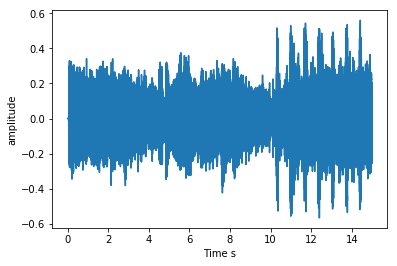

In [26]:
fig,ax=plt.subplots()
ax.plot(time2,audio2)
ax.set(xlabel='Time s',ylabel='amplitude')
plt.show()

NameError: name 'output1' is not defined

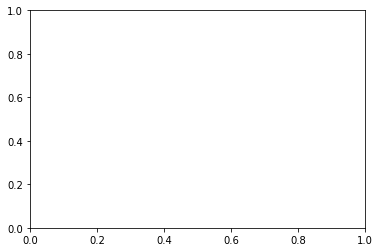

In [27]:
fig,ax=plt.subplots()
ax.plot(time2,output1)
ax.set(xlabel='Time s',ylabel='amplitude')
plt.show()

In [28]:
# Building the encoder
def encoder(x):
    # Encoder Hidden layer with sigmoid activation #1
    layer_1 = tf.nn.sigmoid(tf.add(tf.matmul(x, weights['encoder_h1']),
                                   biases['encoder_b1']))
    # Encoder Hidden layer with sigmoid activation #2
    layer_2 = tf.nn.sigmoid(tf.add(tf.matmul(layer_1, weights['encoder_h2']),
                                   biases['encoder_b2']))
    return layer_2


In [29]:
# Building the decoder
output=[]
def decoder(x):
    # Decoder Hidden layer with sigmoid activation #1
    layer_1 = tf.nn.sigmoid(tf.add(tf.matmul(x, weights['decoder_h1']),
                                   biases['decoder_b1']))
    # Decoder Hidden layer with sigmoid activation #2
    layer_2 = tf.nn.sigmoid(tf.add(tf.matmul(layer_1, weights['decoder_h2']),
                                   biases['decoder_b2']))
    #output=layer_2
    return layer_2

In [30]:
# Network Parameters
num_hidden_1 = 10 # 1st layer num features
num_hidden_2 = 5 # 2nd layer num features (the latent dim)
num_input = 3 # MNIST data input (img shape: 28*28)

# tf Graph input (only pictures)
X = tf.placeholder("float", [None, num_input])

weights = {
    'encoder_h1': tf.Variable(tf.random_normal([num_input, num_hidden_1])),
    'encoder_h2': tf.Variable(tf.random_normal([num_hidden_1, num_hidden_2])),
    'decoder_h1': tf.Variable(tf.random_normal([num_hidden_2, num_hidden_1])),
    'decoder_h2': tf.Variable(tf.random_normal([num_hidden_1, 1])),
}
biases = {
    'encoder_b1': tf.Variable(tf.random_normal([num_hidden_1])),
    'encoder_b2': tf.Variable(tf.random_normal([num_hidden_2])),
    'decoder_b1': tf.Variable(tf.random_normal([num_hidden_1])),
    'decoder_b2': tf.Variable(tf.random_normal([1])),
}

In [31]:
# Construct model
encoder_op = encoder(x)
decoder_op = decoder(encoder_op)

# Prediction
#y_pred = decoder_op
# Targets (Labels) are the input data.
#y_true = X